In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# About Dataset Pokemon
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

1.   **#**: ID for each pokemon
2.   **Name**: Name of each pokemon

1.   **Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks
2.   **Type 2**: Some pokemon are dual type and have 2

1.   **Total**: sum of all stats that come after this, a general guide to how strong a pokemon is
2.   **HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting

1.   **Attack**: the base modifier for normal attacks (eg. Scratch, Punch)
2.   **Defense**: the base damage resistance against normal attacks

1.   **SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
2.   **SP Def**: the base damage resistance against special attacks

1.   **Speed**: determines which pokemon attacks first each round
2.   **Generation**: The numbered generation which the Pokemon was first introduced

1.   **Legendary**: Denotes if the Pokemon is legendary.

This dataset information is from Kaggle, you can access from here: [Dataset Pokemon](https://www.kaggle.com/datasets/abcsds/pokemon)



















In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.drop(['#'], axis=1, inplace=True)

In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# df_mode = df['Type 2'].mode()[0]
# df_mode

In [8]:
df.shape

(800, 12)

In [9]:
# df['Type 2'].fillna(df_mode, inplace=True)
df = df.dropna(subset=['Type 2'])
df.isna().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [10]:
df.shape

(414, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        414 non-null    object
 1   Type 1      414 non-null    object
 2   Type 2      414 non-null    object
 3   Total       414 non-null    int64 
 4   HP          414 non-null    int64 
 5   Attack      414 non-null    int64 
 6   Defense     414 non-null    int64 
 7   Sp. Atk     414 non-null    int64 
 8   Sp. Def     414 non-null    int64 
 9   Speed       414 non-null    int64 
 10  Generation  414 non-null    int64 
 11  Legendary   414 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 39.2+ KB


In [12]:
df['Type 2'].value_counts()
# df['Type 1'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [13]:
df_copy = df.copy()
print('Data setelah di-copy:', df_copy.shape)

# Mendeteksi duplikasi
duplicate_rows_df = df_copy[df_copy.duplicated()]
print('Jumlah duplikasi:', duplicate_rows_df.shape)

# Menghapus duplikasi
df_copy.drop_duplicates(inplace=True)
print('Data setelah dihapus duplikasi:', df_copy.shape)

# Cek duplikasi
if duplicate_rows_df.empty:
    print('Tidak terdapat duplikat')
else:
    print('Terdapat duplikat')

Data setelah di-copy: (414, 12)
Jumlah duplikasi: (0, 12)
Data setelah dihapus duplikasi: (414, 12)
Tidak terdapat duplikat


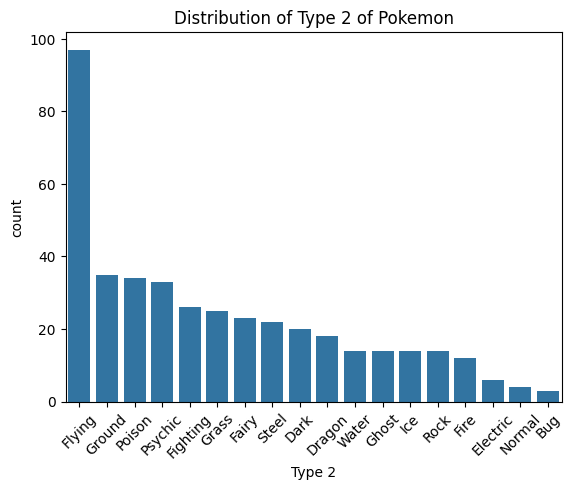

In [30]:
sns.countplot(x='Type 2', data=df, order=df['Type 2'].value_counts().index)
plt.title('Distribution of Type 2 of Pokemon')
plt.xticks(rotation=45)
plt.show()

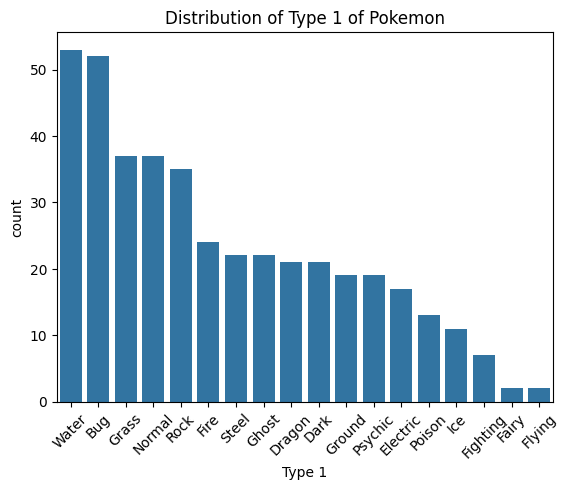

In [31]:
sns.countplot(x='Type 1', data=df, order=df['Type 1'].value_counts().index)
plt.title('Distribution of Type 1 of Pokemon')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Pokemon with the highest attack
df.sort_values('Attack', ascending=False).head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False


In [17]:
# Pokemon with the weakest attack
df.sort_values('Attack').head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
198,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
508,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
179,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False


In [18]:
# Compare the highest attack and the weakest attack pokemon data
data=df[(df['Attack'] == 10) | (df['Attack'] == 190)]
data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


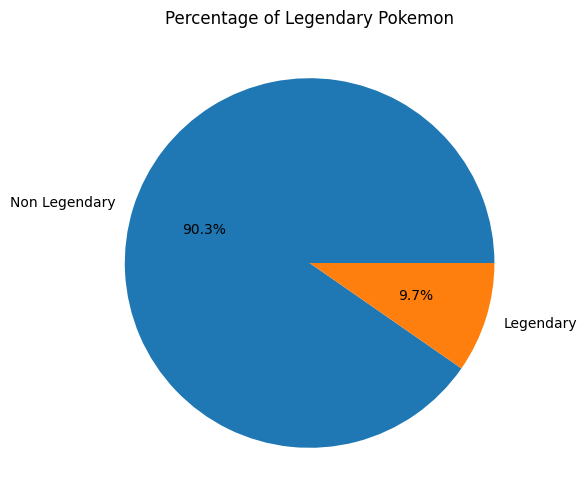

In [19]:
# Percentage of Legendary Pokemon with Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df['Legendary'].value_counts(), labels=['Non Legendary', 'Legendary'], autopct='%1.1f%%')
plt.title('Percentage of Legendary Pokemon')
plt.show()

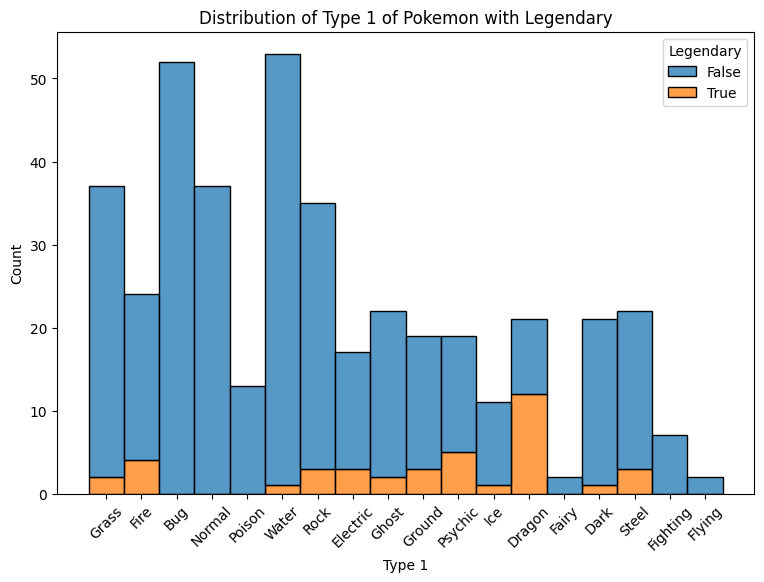

In [20]:
# Distribution of Types of Pokemon with Legendary
plt.figure(figsize=(9, 6))
sns.histplot(x='Type 1', data=df, hue='Legendary', multiple='stack')
plt.title('Distribution of Type 1 of Pokemon with Legendary')
plt.xticks(rotation=45)
plt.show()

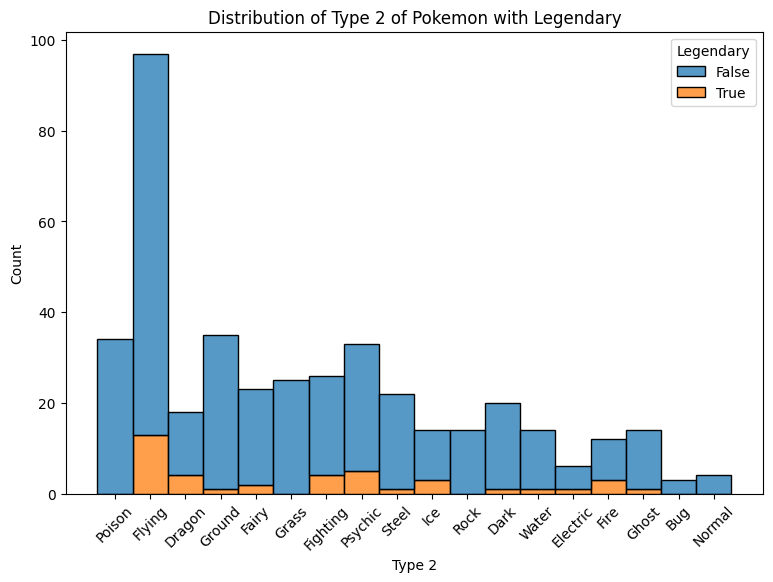

In [21]:
plt.figure(figsize=(9, 6))
sns.histplot(x='Type 2', data=df, hue='Legendary', multiple='stack')
plt.title('Distribution of Type 2 of Pokemon with Legendary')
plt.xticks(rotation=45)
plt.show()

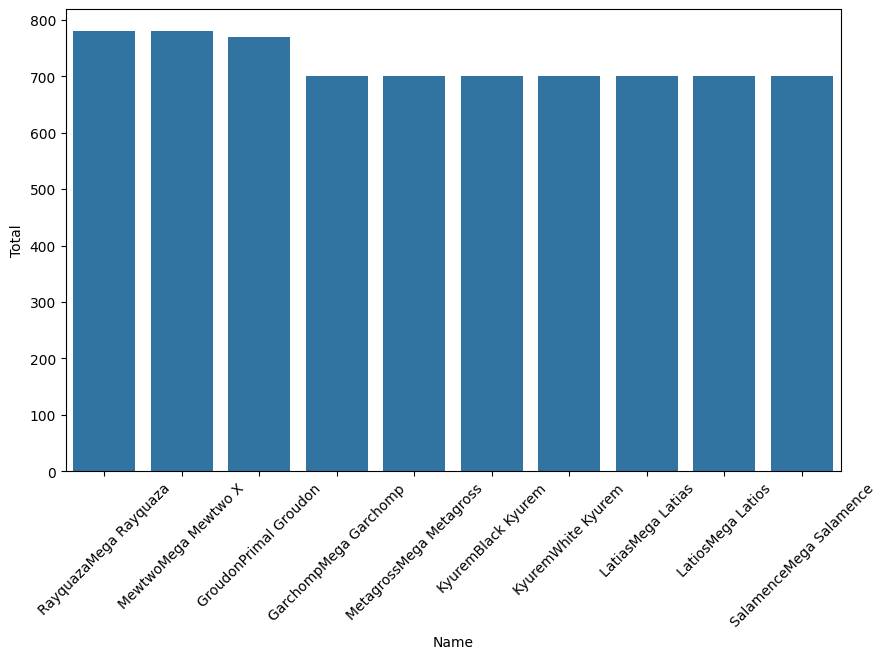

In [22]:
# Top 10 Pokemon by Total
plt.figure(figsize=(10, 6))
top_10_pokemon = df.sort_values('Total', ascending=False).head(10)
sns.barplot(x='Name', y='Total', data=top_10_pokemon)
plt.xticks(rotation=45)
plt.show()

In [23]:
df.groupby('Legendary')[['HP','Attack', 'Defense','Sp. Atk','Sp. Def','Speed']].mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
False,67.893048,79.213904,77.548128,71.804813,72.328877,67.665775
True,96.425000,120.200000,99.575000,126.075000,105.825000,97.150000


In [24]:
df['Legendary'].value_counts()

Legendary
False    374
True      40
Name: count, dtype: int64

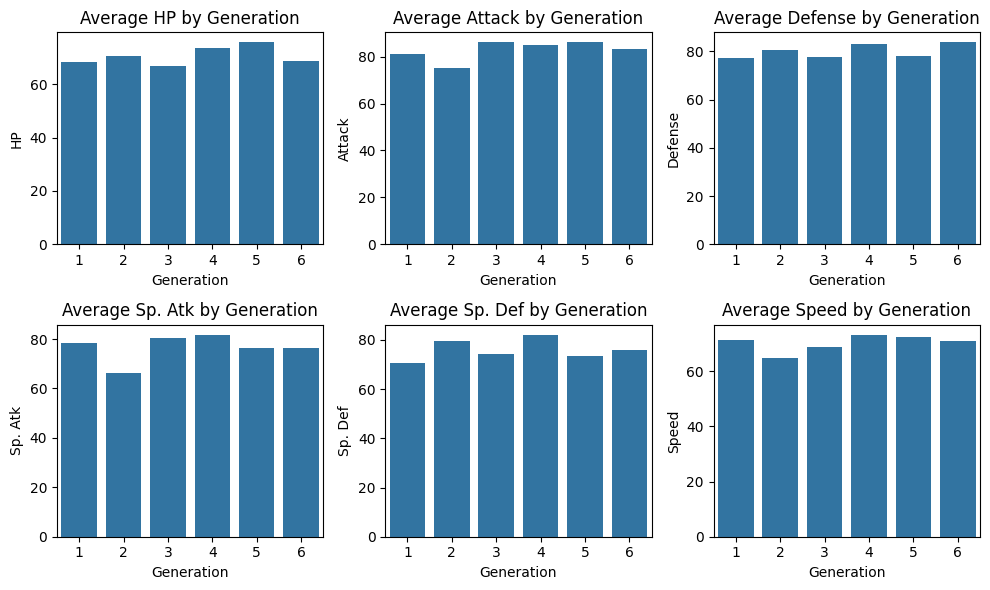

In [25]:
Gen = df.groupby('Generation')[['HP','Attack', 'Defense','Sp. Atk','Sp. Def','Speed']].mean().sort_values('HP', ascending=False)

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(10, 6))

# Plot HP
plt.subplot(2, 3, 1)
sns.barplot(x=Gen.index, y='HP', data=Gen)
plt.title('Average HP by Generation')
plt.xlabel('Generation')
plt.ylabel('HP')

# Plot Attack
plt.subplot(2, 3, 2)
sns.barplot(x=Gen.index, y='Attack', data=Gen)
plt.title('Average Attack by Generation')
plt.xlabel('Generation')
plt.ylabel('Attack')

# Plot Defense
plt.subplot(2, 3, 3)
sns.barplot(x=Gen.index, y='Defense', data=Gen)
plt.title('Average Defense by Generation')
plt.xlabel('Generation')
plt.ylabel('Defense')

# Plot Sp. Atk
plt.subplot(2, 3, 4)
sns.barplot(x=Gen.index, y='Sp. Atk', data=Gen)
plt.title('Average Sp. Atk by Generation')
plt.xlabel('Generation')
plt.ylabel('Sp. Atk')

# Plot Sp. Def
plt.subplot(2, 3, 5)
sns.barplot(x=Gen.index, y='Sp. Def', data=Gen)
plt.title('Average Sp. Def by Generation')
plt.xlabel('Generation')
plt.ylabel('Sp. Def')

# Plot Speed
plt.subplot(2, 3, 6)
sns.barplot(x=Gen.index, y='Speed', data=Gen)
plt.title('Average Speed by Generation')
plt.xlabel('Generation')
plt.ylabel('Speed')

# Menampilkan plot
plt.tight_layout()
plt.show()

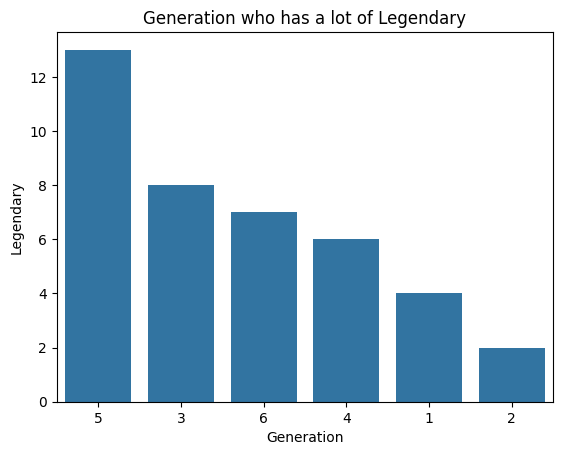

In [26]:
# Generation who has a lot of Legendary
df_gen = df.groupby('Generation')['Legendary'].sum().sort_values(ascending=False)
df_gen_plot = df_gen.reset_index()
sns.barplot(x='Generation', y='Legendary', data=df_gen_plot, order=df_gen_plot['Generation'])
plt.title('Generation who has a lot of Legendary')
plt.xlabel('Generation')
plt.ylabel('Legendary')
plt.show()

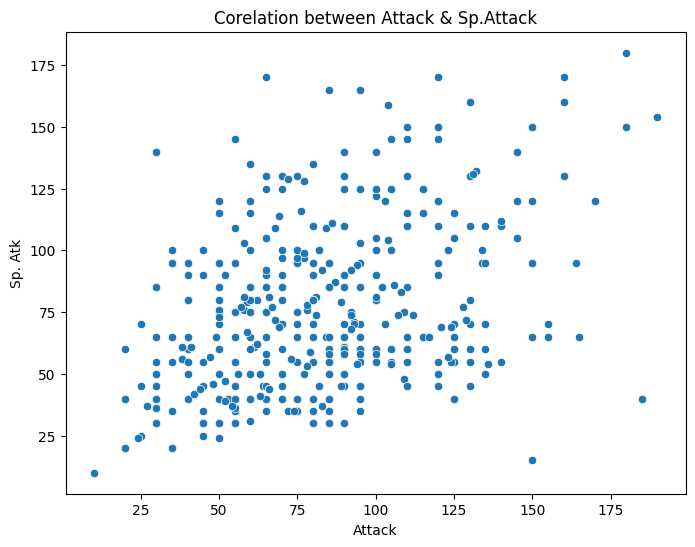

In [27]:
# Corelation between Attack & Sp.Attack
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack', y='Sp. Atk', data=df)
plt.title('Corelation between Attack & Sp.Attack')
plt.show()

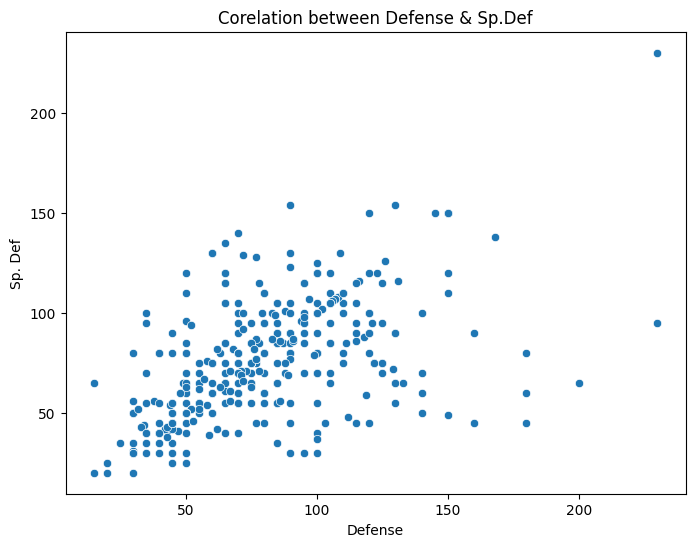

In [28]:
# Corelation between Defense & Sp.Def
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Defense', y='Sp. Def', data=df)
plt.title('Corelation between Defense & Sp.Def')
plt.show()

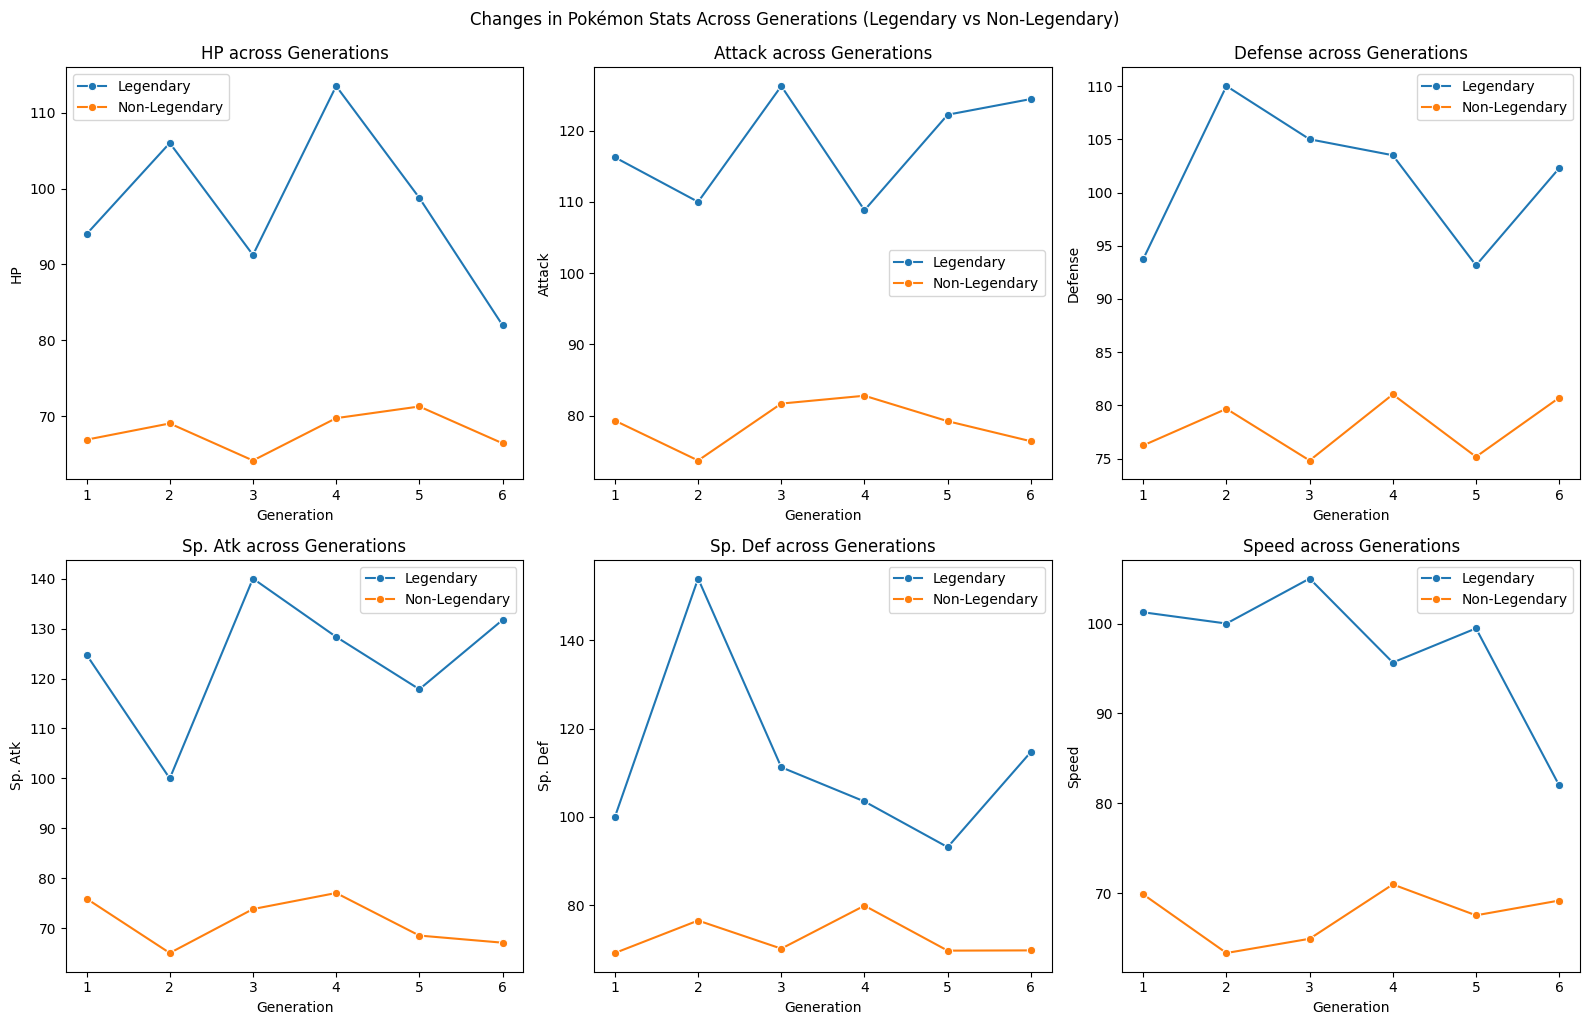

In [29]:
stats = ['HP','Attack', 'Defense','Sp. Atk','Sp. Def','Speed']
df_mean = df.groupby(['Legendary','Generation'])[stats].mean().reset_index()

# Memisahkan data Legendary dan Non-Legendary
df_legendary = df_mean[df_mean['Legendary'] == True]
df_non_legendary = df_mean[df_mean['Legendary'] == False]

# Membuat figure untuk visualisasi
plt.figure(figsize=(16, 10))

# Plotting untuk setiap statistik
for i, stat in enumerate(stats, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=df_legendary, x='Generation', y=stat, label='Legendary', marker='o')
    sns.lineplot(data=df_non_legendary, x='Generation', y=stat, label='Non-Legendary', marker='o')
    plt.title(f'{stat} across Generations')
    plt.xlabel('Generation')
    plt.ylabel(stat)

plt.tight_layout()
plt.suptitle('Changes in Pokémon Stats Across Generations (Legendary vs Non-Legendary)', y=1.02)
plt.legend()
plt.show()